#Этап 1.
T(z)
файл cells.mp4

Генерация кадров:   0%|          | 0/360 [00:00<?, ?it/s]

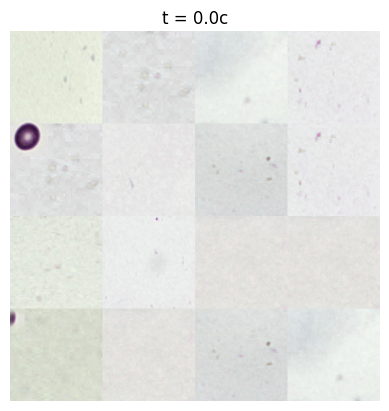

Генерация кадров:  21%|██▏       | 77/360 [00:00<00:01, 258.57it/s]

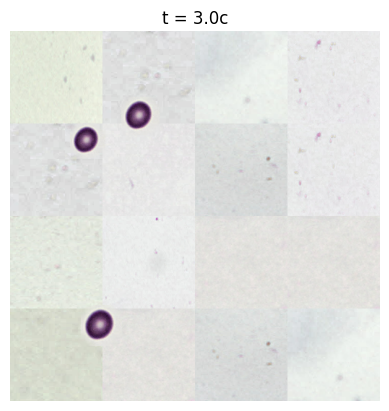

Генерация кадров:  50%|█████     | 180/360 [00:00<00:00, 245.86it/s]

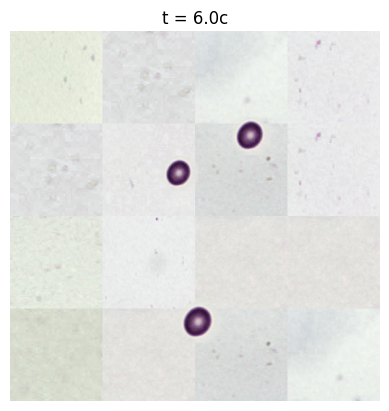

Генерация кадров:  90%|█████████ | 324/360 [00:01<00:00, 288.82it/s]

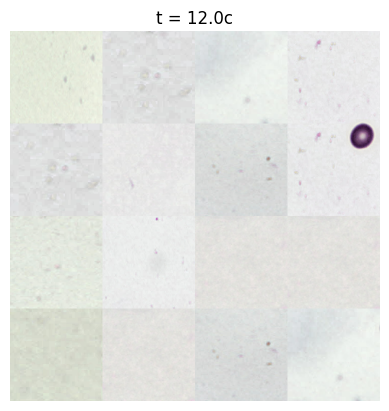

Генерация кадров: 100%|██████████| 360/360 [00:01<00:00, 214.59it/s]

Видео успешно сохранено: cells.mp4


In [30]:
import os
import random
import cv2
import numpy as np
import math
from tqdm import tqdm
from matplotlib import pyplot as plt

def load_images(folder):
    images = []
    for f in os.listdir(folder):
        if f.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(os.path.join(folder, f))
            if img is not None:
                images.append(img)
    return images

def generate_background(bg_images, size=(512, 512)):
    bg = np.zeros((size[0], size[1], 3), dtype=np.uint8)
    patch_size = size[0] // 4

    for i in range(0, size[0], patch_size):
        for j in range(0, size[1], patch_size):
            if bg_images:
                patch = random.choice(bg_images)
                patch = cv2.resize(patch, (patch_size, patch_size))
                bg[i:i+patch_size, j:j+patch_size] = patch
    return bg

def draw_cell_with_blur(bg, cell_img, x, y, blur_size=15):
    h, w = bg.shape[:2]
    cell_h, cell_w = cell_img.shape[:2]

    if x >= w or y >= h or x + cell_w <= 0 or y + cell_h <= 0:
        return bg

    bg_x1, bg_x2 = max(0, x), min(w, x + cell_w)
    bg_y1, bg_y2 = max(0, y), min(h, y + cell_h)
    cell_x1 = max(0, -x)
    cell_x2 = cell_w - max(0, x + cell_w - w)
    cell_y1 = max(0, -y)
    cell_y2 = cell_h - max(0, y + cell_h - h)

    mask = np.zeros((cell_y2-cell_y1, cell_x2-cell_x1), dtype=np.float32)
    cv2.circle(mask, ((cell_x2-cell_x1)//2, (cell_y2-cell_y1)//2),
              min((cell_x2-cell_x1)//2, (cell_y2-cell_y1)//2),
              1, -1)
    mask = cv2.GaussianBlur(mask, (blur_size, blur_size), 0)
    mask = mask[..., None]

    bg[bg_y1:bg_y2, bg_x1:bg_x2] = (
        bg[bg_y1:bg_y2, bg_x1:bg_x2] * (1 - mask) +
        cell_img[cell_y1:cell_y2, cell_x1:cell_x2] * mask
    ).astype(np.uint8)

    return bg

class DisappearingCell:
    def __init__(self, img_size, cell_size):
        self.img_w, self.img_h = img_size
        self.size = cell_size

        self.x = random.randint(-cell_size, 0)
        self.y = random.randint(0, img_size[1] - cell_size)

        self.speed = random.uniform(40.0, 52.0)
        self.amplitude = random.uniform(10.0, 30.0)
        self.frequency = random.uniform(0.03, 0.07)
        self.base_y = self.y
        self.time = 0
        self.active = True

    def update(self, dt):
        if not self.active:
            return False

        self.time += dt
        self.x += self.speed * dt

        noise = math.sin(self.time * 2) * 3
        self.y = (self.base_y +
                 self.amplitude * math.sin(self.frequency * self.x) +
                 noise)

        self.y = max(0, min(self.img_h - self.size, self.y))

        if self.x > self.img_w:
            self.active = False
            return False

        return True

def generate_cell_video(output_path, duration=8, fps=30, img_size=(512, 512), max_cells=5):
    bg_images = load_images("/content/patches/background")
    cell_images = load_images("/content/patches/cells")

    if not bg_images or not cell_images:
        raise ValueError("Проверьте папки с изображениями!")

    background = generate_background(bg_images, img_size)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, img_size)

    cells = []
    total_frames = duration * fps

    for _ in range(max_cells):
        cell_img = random.choice(cell_images)
        cell_size = random.randint(40, 80)
        cell_img = cv2.resize(cell_img, (cell_size, cell_size))

        cells.append({
            'obj': DisappearingCell(img_size, cell_size),
            'img': cell_img,
            'used': False
        })

    active_cells = []

    for frame_idx in tqdm(range(total_frames), desc="Генерация кадров"):
        frame = background.copy()
        current_time = frame_idx / fps

        if frame_idx == 0:
            active_cells = [cell for cell in cells]

        for cell in active_cells[:]:
            if not cell['obj'].update(1/fps):
                active_cells.remove(cell)
                continue

            x, y = int(cell['obj'].x), int(cell['obj'].y)
            frame = draw_cell_with_blur(frame, cell['img'], x, y, blur_size=21)

        out.write(frame)

        if frame_idx in [0, total_frames//4, total_frames//2, total_frames-1]:
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"t = {current_time:.1f}с")
            plt.axis('off')
            plt.show()

    out.release()
    print(f"Видео успешно сохранено: {output_path}")

try:
    generate_cell_video(
        "cells.mp4",
        duration=12,
        fps=30,
        img_size=(512, 512),
        max_cells=3
    )
except Exception as e:
    print(f"Ошибка: {e}")

y(x)
файл y(x)cells.mp4

Загружено: 24 фонов, 1 клеток


Генерация кадров:   0%|          | 0/360 [00:00<?, ?it/s]

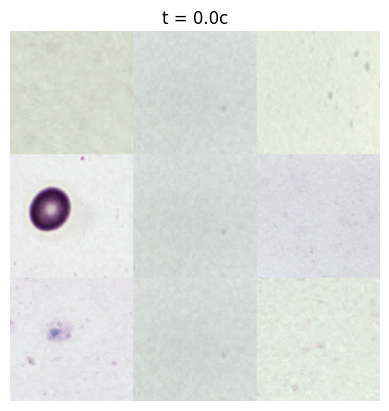

Генерация кадров:  22%|██▏       | 78/360 [00:00<00:01, 200.02it/s]

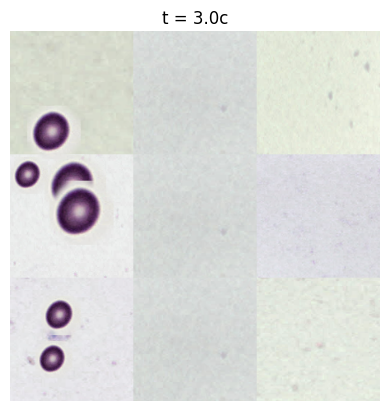

Генерация кадров:  50%|████▉     | 179/360 [00:01<00:01, 167.77it/s]

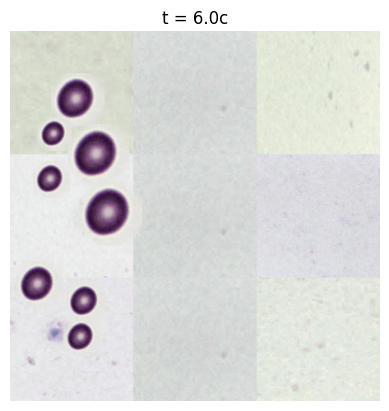

Генерация кадров:  99%|█████████▊| 355/360 [00:02<00:00, 168.38it/s]

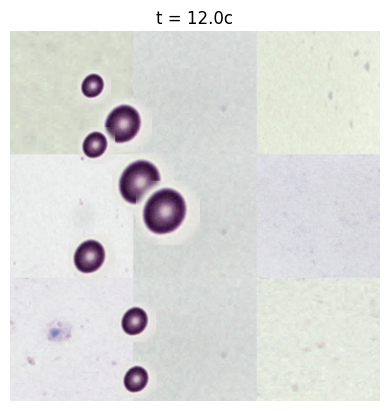

Генерация кадров: 100%|██████████| 360/360 [00:02<00:00, 135.59it/s]

Видео сохранено: y(x)cells.mp4


In [31]:
import os
import random
import cv2
import numpy as np
import math
from tqdm import tqdm
from matplotlib import pyplot as plt

def load_images(folder):
    images = []
    for f in os.listdir(folder):
        if f.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = cv2.imread(os.path.join(folder, f))
            if img is not None:
                images.append(img)
    return images

#фон состоит из 9 патчей, а не из 16
def generate_3x3_background(bg_images, size=(450, 450)):
    bg = np.zeros((size[0], size[1], 3), dtype=np.uint8)
    patch_size = size[0] // 3

    for i in range(0, size[0], patch_size):
        for j in range(0, size[1], patch_size):
            if bg_images:
                patch = random.choice(bg_images)
                patch = cv2.resize(patch, (patch_size, patch_size))
                bg[i:i+patch_size, j:j+patch_size] = patch
    return bg

def draw_cell_with_blur(bg, cell_img, x, y, blur_size=21):
    h, w = bg.shape[:2]
    cell_h, cell_w = cell_img.shape[:2]

    if x >= w or y >= h or x + cell_w <= 0 or y + cell_h <= 0:
        return bg

    bg_x1, bg_x2 = max(0, x), min(w, x + cell_w)
    bg_y1, bg_y2 = max(0, y), min(h, y + cell_h)
    cell_x1, cell_x2 = max(0, -x), cell_w - max(0, x + cell_w - w)
    cell_y1, cell_y2 = max(0, -y), cell_h - max(0, y + cell_h - h)

    mask = np.zeros((cell_y2-cell_y1, cell_x2-cell_x1), dtype=np.float32)
    cv2.circle(mask,
              ((cell_x2-cell_x1)//2, (cell_y2-cell_y1)//2),
              min((cell_x2-cell_x1)//2, (cell_y2-cell_y1)//2),
              1, -1)
    mask = cv2.GaussianBlur(mask, (blur_size, blur_size), 0)
    mask = mask[..., None]

    bg[bg_y1:bg_y2, bg_x1:bg_x2] = (
        bg[bg_y1:bg_y2, bg_x1:bg_x2] * (1 - mask) +
        cell_img[cell_y1:cell_y2, cell_x1:cell_x2] * mask
    ).astype(np.uint8)

    return bg

class CellWithYofX:
    def __init__(self, img_size, cell_size):
        self.img_w, self.img_h = img_size
        self.size = cell_size

        self.x = random.randint(-cell_size//2, 20)
        self.y = random.randint(0, img_size[1] - cell_size)

        self.a = random.uniform(-0.3, 0.3)
        self.b = self.y
        self.c = random.uniform(10, 30)
        self.omega = random.uniform(0.03, 0.08)
        self.speed = random.uniform(8, 12)


        self.noise_phase = random.uniform(0, math.pi*2)
        self.noise_freq = random.uniform(0.5, 2.0)
        self.noise_amp = random.uniform(1, 3)

    def update(self, dt):
        self.x += self.speed * dt

        noise = math.sin(self.noise_phase) * self.noise_amp
        self.noise_phase += self.noise_freq * dt

        self.y = (
            self.b +
            self.a * self.x +
            self.c * math.sin(self.omega * self.x) +
            noise
        )

        self.y = max(0, min(self.img_h - self.size, self.y))

        return self.x < self.img_w + self.size

def generate_y_of_x_video(output_path, duration=10, fps=30, img_size=(450, 450), max_cells=7):
    #генерация с зависимостью y(x)
    bg_images = load_images("/content/patches/background")
    cell_images = load_images("/content/patches/cells")

    if not bg_images or not cell_images:
        raise ValueError("Проверьте папки с изображениями!")

    print(f"Загружено: {len(bg_images)} фонов, {len(cell_images)} клеток")

    background = generate_3x3_background(bg_images, img_size)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, img_size)

    cells = []
    total_frames = duration * fps

    for frame_idx in tqdm(range(total_frames), desc="Генерация кадров"):
        frame = background.copy()
        current_time = frame_idx / fps

        if len(cells) < max_cells and (frame_idx % 20 == 0 or len(cells) < 2):
            cell_img = random.choice(cell_images)
            cell_size = random.randint(40, 80)
            cell_img = cv2.resize(cell_img, (cell_size, cell_size))

            cells.append({
                'obj': CellWithYofX(img_size, cell_size),
                'img': cell_img
            })

        for cell in cells[:]:
            if not cell['obj'].update(1/fps):
                cells.remove(cell)
                continue

            x, y = int(cell['obj'].x), int(cell['obj'].y)
            frame = draw_cell_with_blur(frame, cell['img'], x, y)

        out.write(frame)

        if frame_idx in [0, total_frames//4, total_frames//2, total_frames-1]:
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"t = {current_time:.1f}с")
            plt.axis('off')
            plt.show()

    out.release()
    print(f"Видео сохранено: {output_path}")

try:
    generate_y_of_x_video(
        "y(x)cells.mp4",
        duration=12,
        fps=30,
        img_size=(450, 450),
        max_cells=8
    )
except Exception as e:
    print(f"Ошибка: {e}")